In [1]:
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import numpy as np
import metpy.calc
from metpy.plots import add_metpy_logo, add_timestamp
import datetime
import netCDF4
#%% plot together
import datetime       
# utility for nonlinear colorscale
       
from pylab import *
from numpy import *

In [2]:

# single variable file:
ds = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/WRF_OUTPUT/out.QCLOUD.nc")
data1_3x = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley_bio_off_3x/nest-POVALLEY4-BIOx3/out.QCLOUD_3X.nc")
ncfile = Dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/WRF_OUTPUT/wrfout_d01_2017-07-01_00:00:00")
# get GEOG file
geog = xr.open_dataset('/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/WRF_OUTPUT/geog_POVALLEY4.nc')
test = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/out_total_OA_bOA_aOA_ASOA_BSOA_POA_OPOA.PV4.nc")

In [3]:
qc_join = ds.QCLOUD

In [4]:
qc_join_3x = data1_3x.QCLOUD

In [5]:
qc_join1 = np.where(qc_join.south_north < 168 - 106/258*qc_join.west_east,  np.nan, qc_join)

In [7]:
qc_join2 = np.nanmean(qc_join1, axis=(0))
qc_join3 = np.nanmean(qc_join1, axis=(0,1,2))

/tmp/appoloni/2696199/ipykernel_1175510/218930877.py:1: RuntimeWarning: Mean of empty slice
  qc_join2 = np.nanmean(qc_join1, axis=(0))
/tmp/appoloni/2696199/ipykernel_1175510/218930877.py:2: RuntimeWarning: Mean of empty slice
  qc_join3 = np.nanmean(qc_join1, axis=(0,1,2))


In [6]:
qc_join4 = np.nanmean(qc_join1, axis=(1,2,3))

In [7]:
qc_join_3x1 = np.where(qc_join_3x.south_north < 168 - 106/258*qc_join_3x.west_east,  np.nan, qc_join_3x)

In [ ]:
qc_join_3x2 = np.nanmean(qc_join_3x1, axis=(0))
qc_join_3x3 = np.nanmean(qc_join_3x1, axis=(0,1,2))

In [8]:
qc_join_3x4 = np.nanmean(qc_join_3x1, axis=(1,2,3))

In [ ]:
qc_join4

In [ ]:
qc_join_3x4

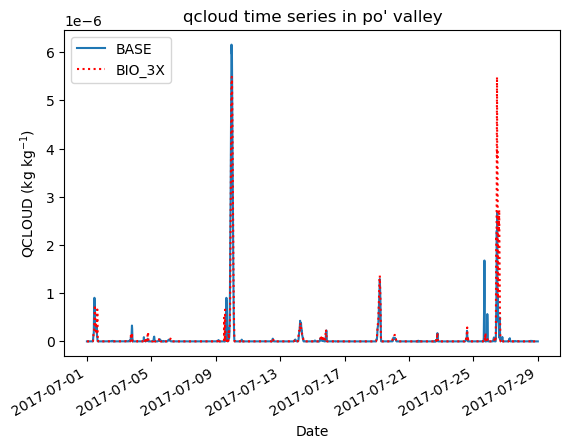

In [9]:
start_date = datetime.datetime(2017, 7, 1)
time_intervals = np.arange(0, len(qc_join4)) * datetime.timedelta(minutes=20)
dates = [start_date + interval for interval in time_intervals]
plt.plot(dates,qc_join4, label="BASE")
plt.plot(dates,qc_join_3x4,linestyle="dotted", label="BIO_3X",color = 'red')
plt.legend()
plt.title("qcloud time series in po' valley" )
plt.xlabel('Date')
plt.ylabel('QCLOUD (kg kg$^{-1}$)')
# Formattazione delle etichette dell'asse x per mostrare solo l'anno, il mese e il giorno
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()

(17373.0, 17374.0)

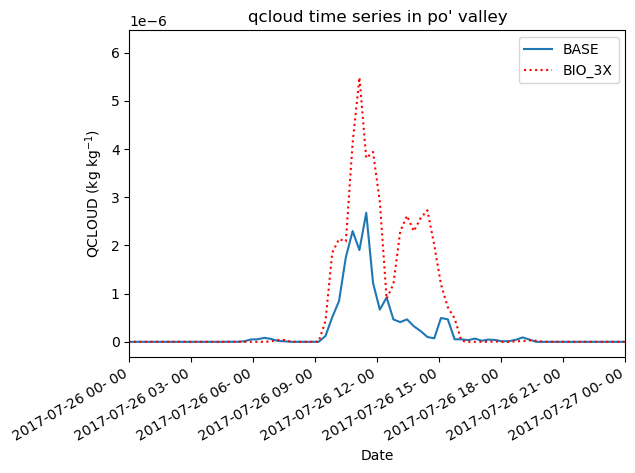

In [11]:
plt.plot(dates,qc_join4, label="BASE")
plt.plot(dates,qc_join_3x4,linestyle="dotted", label="BIO_3X",color = 'red')
plt.legend()
plt.title("qcloud time series in po' valley" )
plt.xlabel('Date')
plt.ylabel('QCLOUD (kg kg$^{-1}$)')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H- %M'))

# Ruotare le etichette dell'asse x per una migliore leggibilità
plt.gcf().autofmt_xdate()
# Impostazione dei limiti dell'asse x
start_limit = datetime.datetime(2017, 7, 26,0,0)
end_limit = datetime.datetime(2017, 7, 27,0,0)
plt.xlim(start_limit, end_limit)